In [17]:
import pandas as pd
import matplotlib.pyplot as plt

For the data we will only use the tuple $(u_k, i_m, r_{km})$, where $u_k$ is the $k$-th user, $i_m$ is the $m$-th item and $r_{km}$ is the rating that $u_k$ gave to $i_m$.

First column corresponds to $u_k$, second to $i_m$ and the third to $r_{km}$

In [34]:
data = pd.read_csv("../data/raw/ml-100k/u.data", sep="\t", names=['user', 'item', 'rating', 'timestamp'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user       100000 non-null  int64
 1   item       100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


Let's drop the timestamp column

In [35]:
data.drop('timestamp', axis=1, inplace=True)
data

,user,item,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


The user and item metadata will not be needed for the solutions considered.

Now, let's see the interactions between users and items.

In [36]:
data.nunique()

user       943
item      1682
rating       5
dtype: int64

In [37]:
items_per_user = data.groupby('user')['item'].count()
items_per_user

user
1      272
2       62
3       54
4       24
5      175
      ... 
939     49
940    107
941     22
942     79
943    168
Name: item, Length: 943, dtype: int64

In [38]:
# Calculate mean, median, min and max
mean_items = items_per_user.mean()
median_items = items_per_user.median()
min_items = items_per_user.min()
max_items = items_per_user.max()

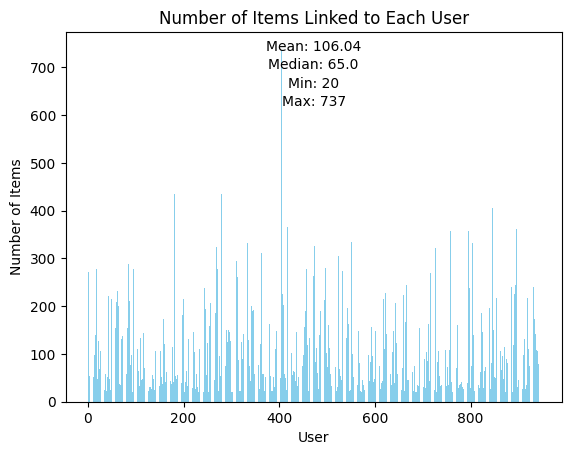

In [39]:
# plot 

plt.bar(items_per_user.index, items_per_user.values, color='skyblue')
plt.xlabel('User')
plt.ylabel('Number of Items')
plt.title('Number of Items Linked to Each User')

plt.text(0.5, 0.95, f'Mean: {mean_items:.2f}', transform=plt.gca().transAxes, ha='center')
plt.text(0.5, 0.9, f'Median: {median_items}', transform=plt.gca().transAxes, ha='center')
plt.text(0.5, 0.85, f'Min: {min_items}', transform=plt.gca().transAxes, ha='center')
plt.text(0.5, 0.8, f'Max: {max_items}', transform=plt.gca().transAxes, ha='center')

plt.show()

Save the intermediate table

In [40]:
data.to_csv("../data/interim/data.csv", index=False)